# Análisis Exploratorio de Datos - EDA

In [1]:
# Importar las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Cargar los datos con los que se va a trabajar
df = pd.read_csv('homicidios_Final.csv', index_col=0)
df

,ID,Numero de víctimas,Fecha,Año,Mes,Día,Hora,Hora entera,Tipo de Calle,Comuna,Pos x,Pos y,Participantes,Acusado,Rol,Víctima,Sexo,Edad
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AVENIDA,8,-58.475340,-34.687570,MOTO-AUTO,AUTO,CONDUCTOR,MOTO,MASCULINO,19
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,GRAL PAZ,9,-58.508775,-34.669777,AUTO-PASAJEROS,PASAJEROS,CONDUCTOR,AUTO,MASCULINO,70
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AVENIDA,1,-58.390403,-34.631894,MOTO-AUTO,AUTO,CONDUCTOR,MOTO,MASCULINO,30
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AVENIDA,8,-58.465039,-34.680930,MOTO-SD,SD,CONDUCTOR,MOTO,MASCULINO,18
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AVENIDA,1,-58.387183,-34.622466,MOTO-PASAJEROS,PASAJEROS,CONDUCTOR,MOTO,MASCULINO,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AVENIDA,7,-58.433538,-34.645616,MOTO-AUTO,AUTO,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18
713,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AUTOPISTA,9,-58.467398,-34.651178,MOTO-AUTO,AUTO,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43
714,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AVENIDA,11,-58.472934,-34.619847,MOTO-CARGAS,CARGAS,CONDUCTOR,MOTO,MASCULINO,27
715,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AVENIDA,9,-58.470668,-34.650217,AUTO-CARGAS,CARGAS,CONDUCTOR,AUTO,MASCULINO,60


#### A continuación se realizarán algunas visualizaciónes de medidas globales, que luego podrán ser exploradas a mayor profundidad en el dashboard aprovechando la interactividad de la herramienta. Se propone analizar patrones de distribución de los accidentes y las víctimas según criterios demográficos, espaciales y temporales.

### Distribucion temporal de las víctimas

#### Número total de víctimas fatales por año

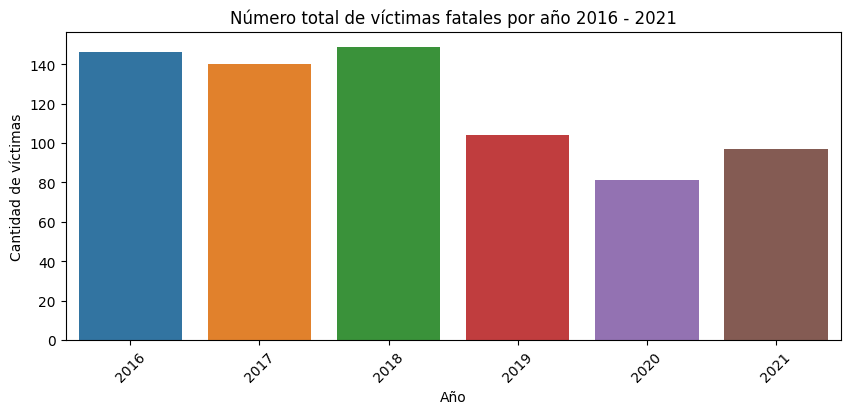

In [9]:
plt.style.use('fast')
plt.figure(figsize=(10,4))
sns.countplot(data = df, x = "Año")
plt.xticks(rotation=45)
plt.ylabel('Cantidad de víctimas')
plt.xlabel('Año')
plt.title('Número total de víctimas fatales por año 2016 - 2021')
plt.show()

Como era de esperarse, el año con menos víctimas es el 2020, se asume que esto sucecdió debido a los confinamientos por Covid 19

#### Distribución de vícitmas fatales por mes

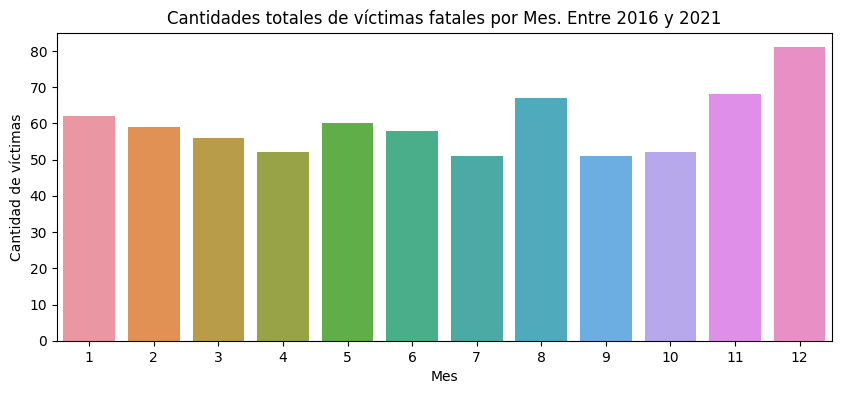

In [11]:
# Distribución de víctimas por mes
mes = df.groupby('Mes').agg({'Numero de víctimas':'count'}).reset_index()
    
    # Se grafica
plt.figure(figsize=(10,4))
ax = sns.barplot(x='Mes', y='Numero de víctimas', data=mes)
ax.set_title('Cantidades totales de víctimas fatales por Mes. Entre 2016 y 2021')
ax.set_xlabel('Mes') ; ax.set_ylabel('Cantidad de víctimas')
plt.show()

Se observa un pico notorio en la cantidad de víctimas durante el mes de diciembre. Otros meses que también tienen una cantidad notablemente más alta son noviembre y agosto.

#### Distribución de accidentes con víctimas fatales por mes, gráficos anuales comparados:

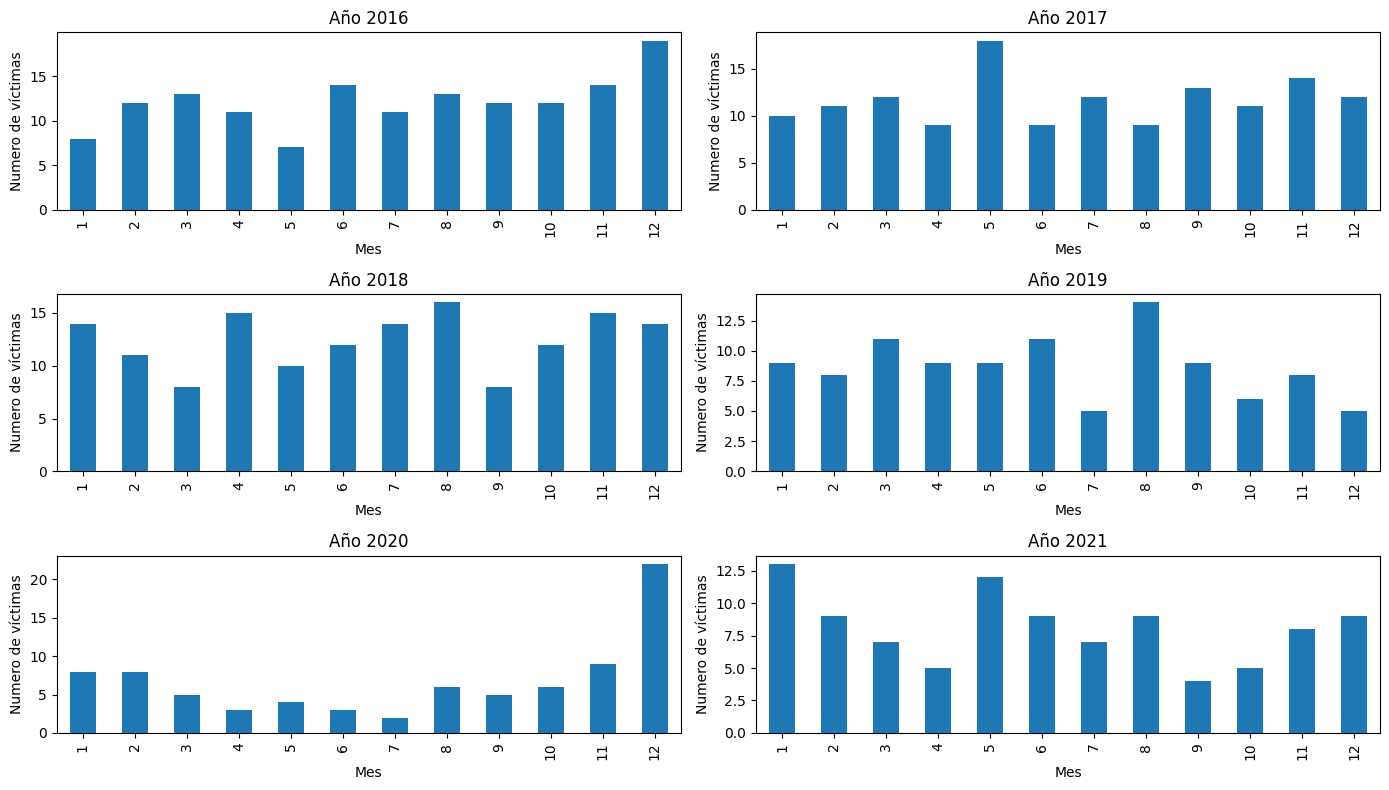

In [12]:
#gráfica con subplots por año, para comparar tendencias
anios = df['Año'].unique()

n_filas = 3
n_columnas = 2
fig, axes = plt.subplots(n_filas, n_columnas, figsize=(14, 8))

for i, year in enumerate(anios):
    fila = i // n_columnas
    columna = i % n_columnas
    data_mensual = (df[df['Año'] == year].groupby('Mes').agg({'Numero de víctimas':'count'}))
        
     # Se configura el subgráfico actual
    ax = axes[fila, columna]
    data_mensual.plot(ax=ax, kind='bar')
    ax.set_title('Año ' + str(year)) ; ax.set_xlabel('Mes') ; ax.set_ylabel('Numero de víctimas')
    ax.legend_ = None
        
    # Se muestra y acomoda el gráfico
plt.tight_layout()
plt.show()

A diferencia del gráfico acumulado, es interesante observar que al analizar año por año ya no se observa con tanta consistencia un patrón relacionado con la accidentalidad según los meses del año.

#### Distribución de accidentes con víctimas fatales, día por día a lo largo del mes

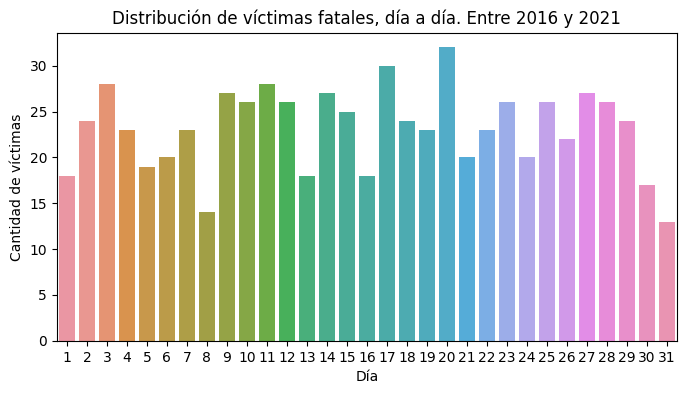

In [13]:
#Distribución de víctimas por día de la semana
dia = df.groupby('Día').agg({'Numero de víctimas':'count'}).reset_index()
    
    # Se grafica
plt.figure(figsize=(8,4))
ax = sns.barplot(x='Día', y='Numero de víctimas', data=dia)
ax.set_title('Distribución de víctimas fatales, día a día. Entre 2016 y 2021')
ax.set_xlabel('Día') ; ax.set_ylabel('Cantidad de víctimas')
plt.show()

#### Distribución de accidentes con víctimas fatales, a lo largo de las 24 horas

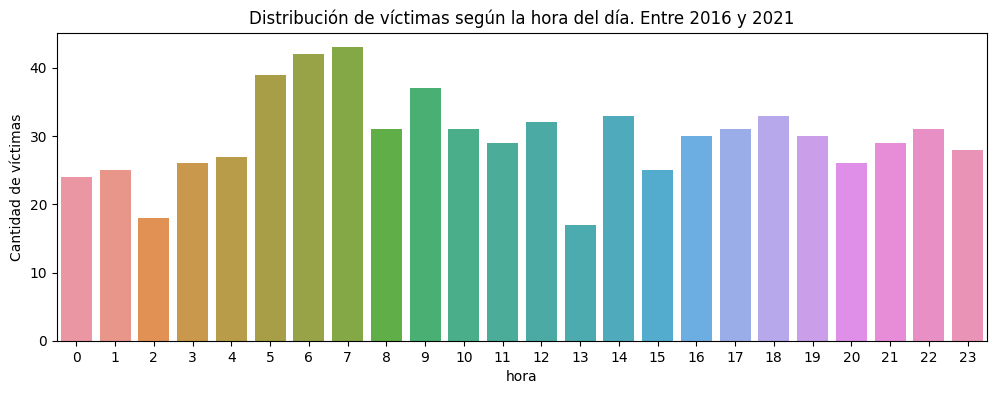

In [15]:
#Distribución de víctimas fatales según la hora del día
hora = df.groupby('Hora entera').agg({'Numero de víctimas':'count'}).reset_index()
    
    # Se grafica
plt.figure(figsize=(12,4))
ax = sns.barplot(x='Hora entera', y='Numero de víctimas', data=hora)
ax.set_title('Distribución de víctimas según la hora del día. Entre 2016 y 2021')
ax.set_xlabel('hora') ; ax.set_ylabel('Cantidad de víctimas')
plt.show()

La principal conclusión que se puede extraer de esta gráfica es que entre las 5 y las 7 de la mañana es cuando ocurren más accidentes, coincidiendo en la hora en que, normalmente, la mayoría de las personas se están desplazando hacia sus lugares de trabajo o de estudio.

### Distribución demográfica de las víctimas.

#### Cantidad de víctimas fatales de cada año, entre 2016 y 2021, discriminadas por sexo

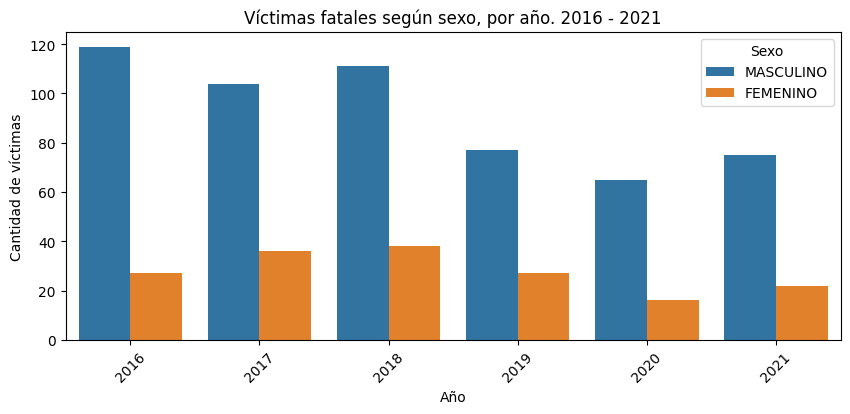

In [16]:
#Víctimas según sexo, por año
plt.figure(figsize=(10,4))
sns.countplot(data = df, x = "Año", hue='Sexo')
plt.xticks(rotation=45)
plt.ylabel('Cantidad de víctimas')
plt.xlabel('Año')
plt.title('Víctimas fatales según sexo, por año. 2016 - 2021')
plt.show()

Es evidente en la gráfica que son muchos más los hombres que las mujeres que fallecen en accidentes de tránsito. Valdrá la pena explorar proporciones y contrastar con los tipos de vehículos involucrados, los roles y la participación de estos en los accidentes.

#### Cantidad de víctimas según su sexo y rango de edad

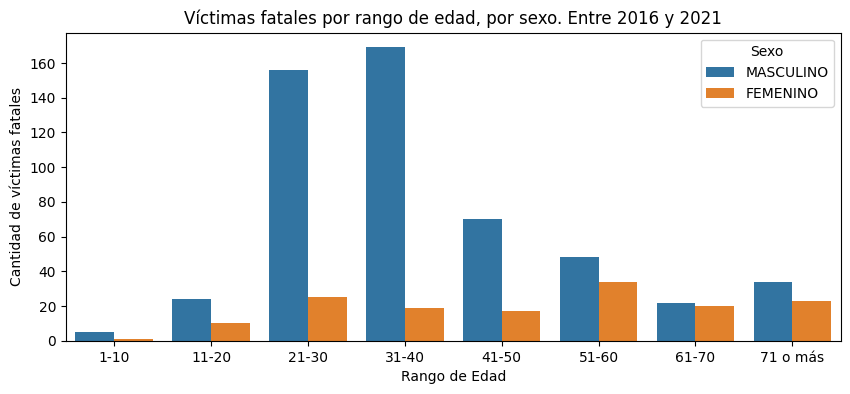

In [8]:
#Víctimas por sexo, según rango de edad 
# Creamos los rangos de edad
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['1-10', '11-20', '21-30','31-40','41-50', '51-60', '61-70', '71 o más']
df['Rango_Edad'] = pd.cut(df['Edad'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10,4))
sns.countplot(data = df, x = "Rango_Edad", hue='Sexo')
plt.ylabel('Cantidad de víctimas fatales')
plt.xlabel('Rango de Edad')
plt.title('Víctimas fatales por rango de edad, por sexo. Entre 2016 y 2021')
plt.show()


Fueron pocas las personas mayores de 80 años que muerieron en accidentes de tránsito, podemos encontrarlos como outliers en la gráfica en los años 2016, 2017 y 2019.
La gran mayoría de las víctimas se cuentan entre los 16 y los 45 años de edad.

### Estadísticas según tipo de usuario

#### Víctimas fatales según el vehículo que ocupaban


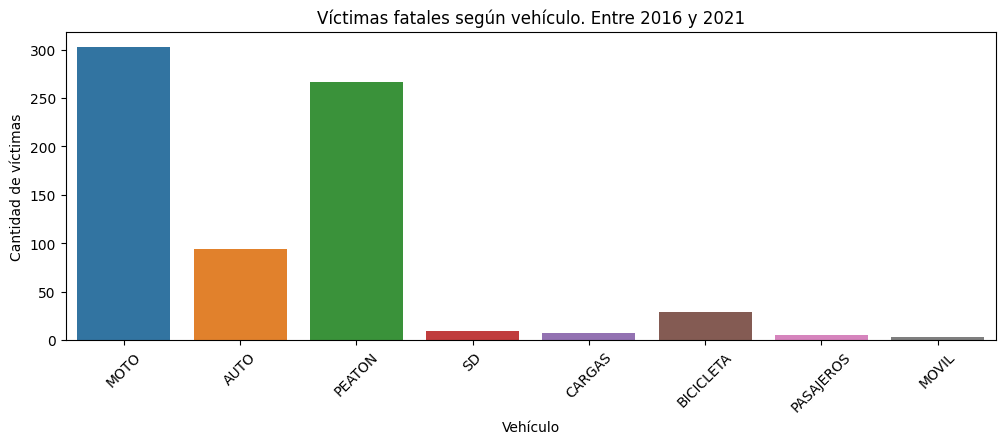

In [17]:
plt.figure(figsize=(12,4))
sns.countplot(data = df, x = "Víctima")
plt.xticks(rotation=45)
plt.ylabel('Cantidad de víctimas')
plt.xlabel('Vehículo')
plt.title('Víctimas fatales según vehículo. Entre 2016 y 2021')
plt.show()

Repito la gráfica anterior, discriminando por sexo

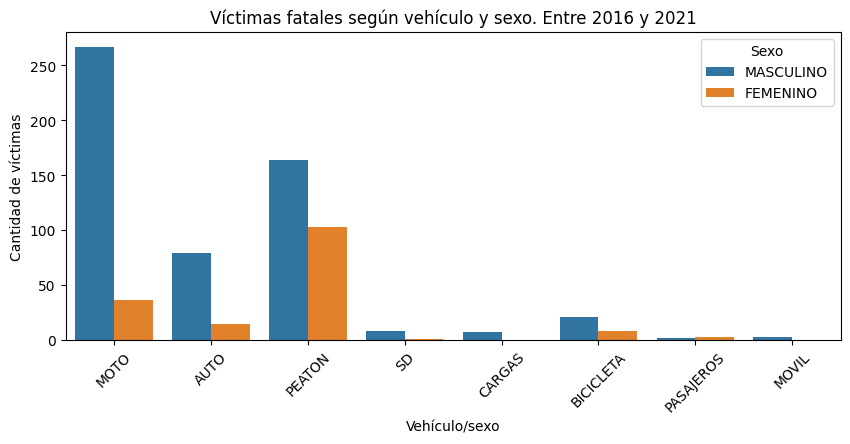

In [18]:
plt.figure(figsize=(10,4))
sns.countplot(data = df, x = "Víctima", hue='Sexo')
plt.xticks(rotation=45)
plt.ylabel('Cantidad de víctimas')
plt.xlabel('Vehículo/sexo')
plt.title('Víctimas fatales según vehículo y sexo. Entre 2016 y 2021')
plt.show()

Los motociclistas y los peatones son quienes se encuentran más vulnerables en un accidente vial y eso queda evidenciado en la cantidad de fallecimientos correspondientes a estas dos categorías.

#### Distribución de víctimas según el Rol, es decir, la posición relativa al vehículo que presentaba ésta en el momento del siniestro.

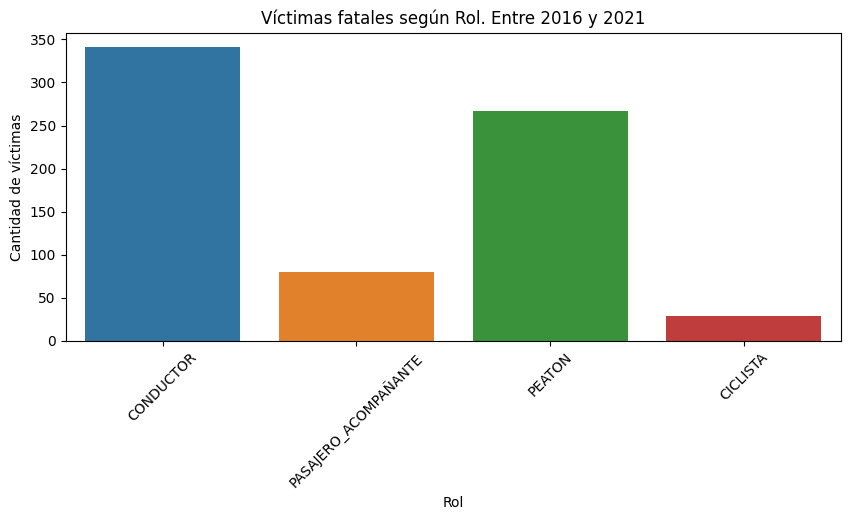

In [21]:
plt.figure(figsize=(10,4))
sns.countplot(data = df, x = "Rol")
plt.xticks(rotation=45)
plt.ylabel('Cantidad de víctimas')
plt.xlabel('Rol')
plt.title('Víctimas fatales según Rol. Entre 2016 y 2021')
plt.show()

Repito la gráfica anterior, discriminando por sexo

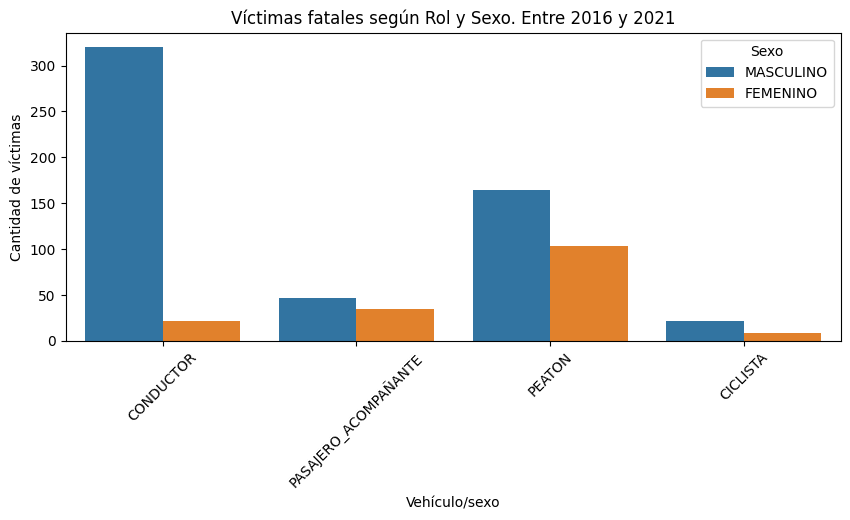

In [20]:
plt.figure(figsize=(10,4))
sns.countplot(data = df, x = "Rol", hue='Sexo')
plt.xticks(rotation=45)
plt.ylabel('Cantidad de víctimas')
plt.xlabel('Vehículo/sexo')
plt.title('Víctimas fatales según Rol y Sexo. Entre 2016 y 2021')
plt.show()

Son los conductores quienes tienen más cantidad de víctimas fatales, seguidos por los peatones. Vale la pena combinar rol y vehículo al elaborar el dashboard, pues me atrevo a predecir que una alta proporción de estos conductores debían ser motociclistas

#### Distibución según los participantes en los accidentes
La columna participantes muestra la combinación de vehículos involucrados en un accidente.

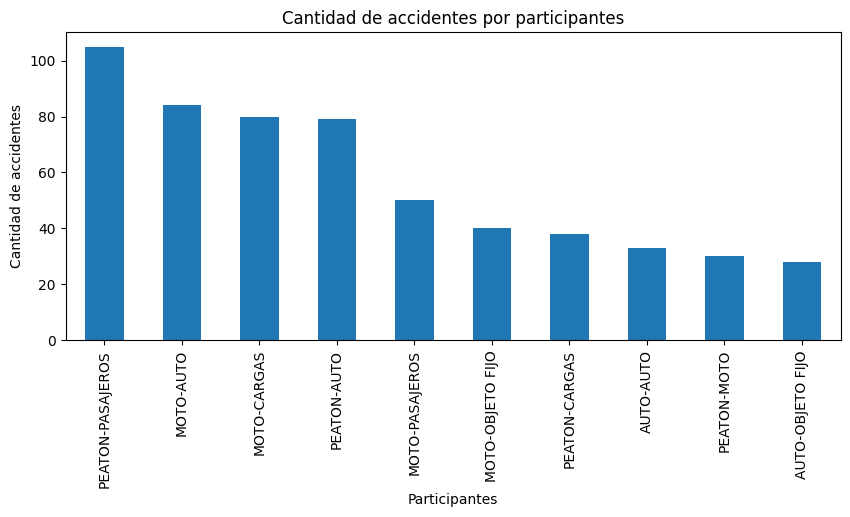

In [61]:
plt.figure(figsize=(10,4))
participantes=df.groupby("Participantes")["Numero de víctimas"].count()
participantes.sort_values(ascending=False).head(10).plot(kind='bar')
plt.xticks(rotation=90)
plt.title('Cantidad de accidentes por participantes')
plt.ylabel('Cantidad de accidentes')
plt.xlabel('Participantes')
plt.show()

Únicamente en dos de las diez  posibles combinaciones no está involucrado un peatón o un motociclista. Esto sigue dejando en evidencia la vulnerabilidad de estos en los siniestros viales y nos da insights de hacia dónde deberían encaminarse las campañas de prevencion para reducir los indices de accidentalidad y muertes.

### Distribución espacial de los accidentes con víctimas fatales

### Accidentes según el tipo de vía

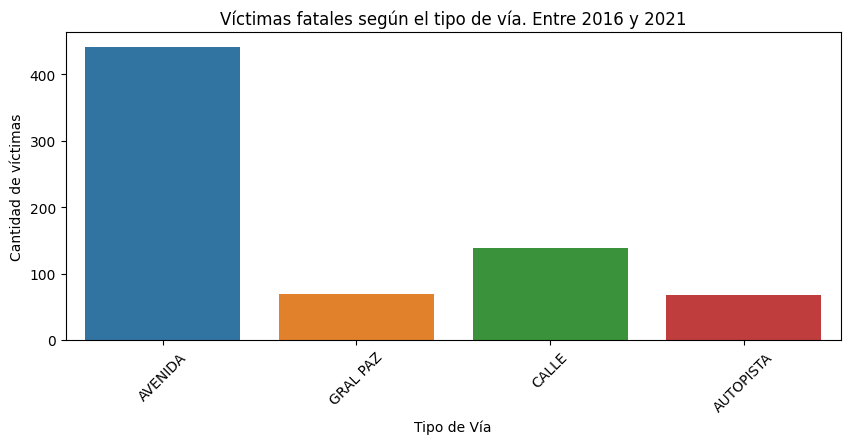

In [22]:
plt.figure(figsize=(10,4))
sns.countplot(data = df, x = "Tipo de Calle")
plt.xticks(rotation=45)
plt.ylabel('Cantidad de víctimas')
plt.xlabel('Tipo de Vía')
plt.title('Víctimas fatales según el tipo de vía. Entre 2016 y 2021')
plt.show()

La accidentalidad es notoriamente más alta en las Avenidas, que en los demás tipos de vías.

#### Accidentes por comuna

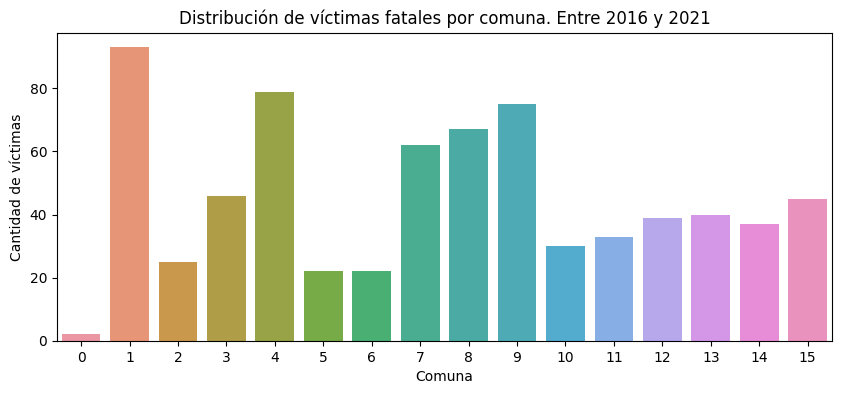

In [23]:
plt.figure(figsize=(10,4))
sns.countplot(data = df, x = "Comuna")
plt.ylabel('Cantidad de víctimas')
plt.xlabel('Comuna')
plt.title('Distribución de víctimas fatales por comuna. Entre 2016 y 2021')
plt.show()

Las tres comunas con mayor cantidad de vícitimas fatales son la 1, la 4 y la 9.